# Warming stripes visualization

See https://en.wikipedia.org/wiki/Warming_stripes# for more information


In [164]:
import datetime
import numpy as np
import matplotlib.pyplot as plt
import os
import xarray as xr
import pandas as pd
import matplotlib.patches as mpatches
from matplotlib.pyplot import figure


In [124]:
historical_file_name="./data/historical/tas_Amon_CNRM-CM6-1-HR_historical_r1i1p1f2_gr_18500116-20141216_v20191021.nc"

In [30]:
file_name="./data/tas_Amon_CNRM-CM6-1-HR_ssp245_r1i1p1f2_gr_20150116-21001216_v20191202.nc"

In [31]:
def kelvin_to_celsius(kelvin):
    return kelvin - 273.15

In [32]:
ds = xr.open_dataset(file_name)
# ds

In [137]:
dsh = xr.open_dataset(historical_file_name)
# dsh

In [176]:
arr = ds.sel(lat=48.0, lon=2.0, method="nearest")
# arr

<xarray.Dataset>
Dimensions:      (time: 1032, axis_nbounds: 2)
Coordinates:
    lat          float64 48.18
    lon          float64 2.0
    height       float64 ...
  * time         (time) datetime64[ns] 2015-01-16T12:00:00 ... 2100-12-16T12:...
Dimensions without coordinates: axis_nbounds
Data variables:
    time_bounds  (time, axis_nbounds) datetime64[ns] ...
    tas          (time) float32 ...
Attributes: (12/52)
    Conventions:            CF-1.7 CMIP-6.2
    creation_date:          2019-10-15T08:22:16Z
    description:            Future scenario with medium radiative forcing by ...
    title:                  CNRM-CM6-1-HR model output prepared for CMIP6 and...
    activity_id:            ScenarioMIP
    contact:                contact.cmip@meteo.fr
    ...                     ...
    dr2xml_md5sum:          45d4369d889ddfb8149d771d8625e9ec
    xios_commit:            1442-shuffle
    nemo_gelato_commit:     84a9e3f161dade7_8250e198106a168
    arpege_minor_version:   6.3.3
    history:                none
    tracking_id:            hdl:21.14100/294128ce-5b09-47e1-8ac7-1e1bbf015d10

In [138]:
arr_h = dsh.sel(lat=48.0, lon=2.0, method="nearest")
# arr_h

In [142]:
all_years = xr.concat([arr_h, arr], dim="time", coords="minimal", compat="minimal")
# all_years

## Simulation Forecast

In [34]:
y = [kelvin_to_celsius(x) for x in arr["tas"].values]
x = arr["time"].values

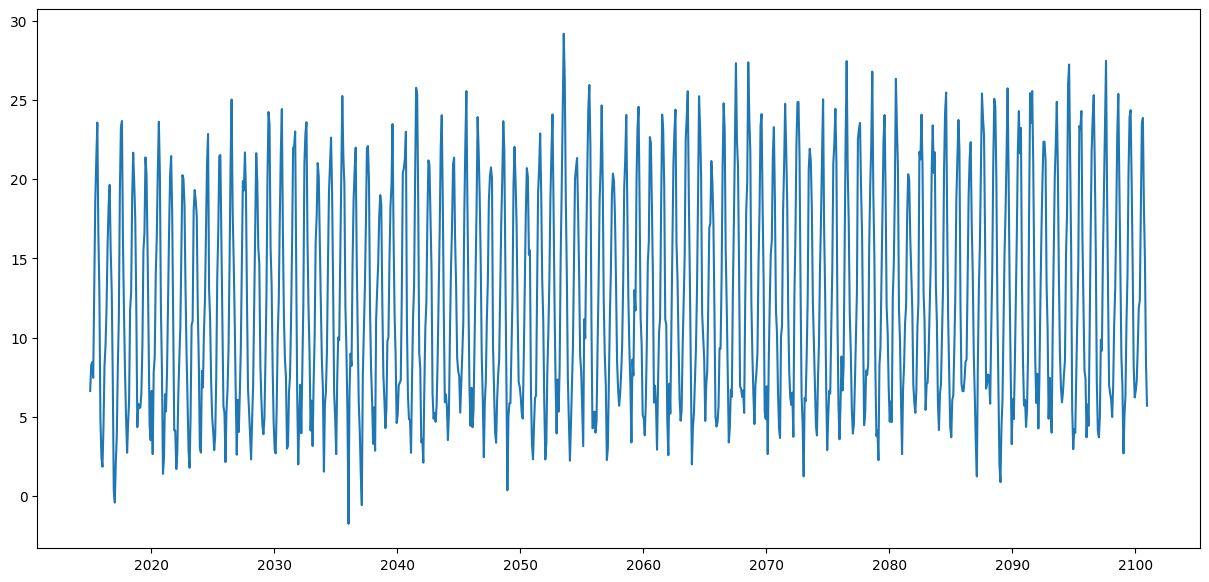

In [44]:
fig, ax = plt.subplots(figsize=(15, 7))
ax.plot(x, y)

In [136]:
df = pd.DataFrame(data={"date": x, "temperature": y })
s_by_year = df.groupby(df.date.dt.year)["temperature"].mean()

In [87]:
s_by_year

date
2015    12.013630
2016    10.516829
2017    10.953127
2018    11.491864
2019    11.226536
          ...    
2096    13.260235
2097    13.217444
2098    13.090557
2099    13.051393
2100    13.354267
Name: temperature, Length: 86, dtype: float64

In [88]:
s_by_year.index

Index([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026,
       2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035, 2036, 2037, 2038,
       2039, 2040, 2041, 2042, 2043, 2044, 2045, 2046, 2047, 2048, 2049, 2050,
       2051, 2052, 2053, 2054, 2055, 2056, 2057, 2058, 2059, 2060, 2061, 2062,
       2063, 2064, 2065, 2066, 2067, 2068, 2069, 2070, 2071, 2072, 2073, 2074,
       2075, 2076, 2077, 2078, 2079, 2080, 2081, 2082, 2083, 2084, 2085, 2086,
       2087, 2088, 2089, 2090, 2091, 2092, 2093, 2094, 2095, 2096, 2097, 2098,
       2099, 2100],
      dtype='int32', name='date')

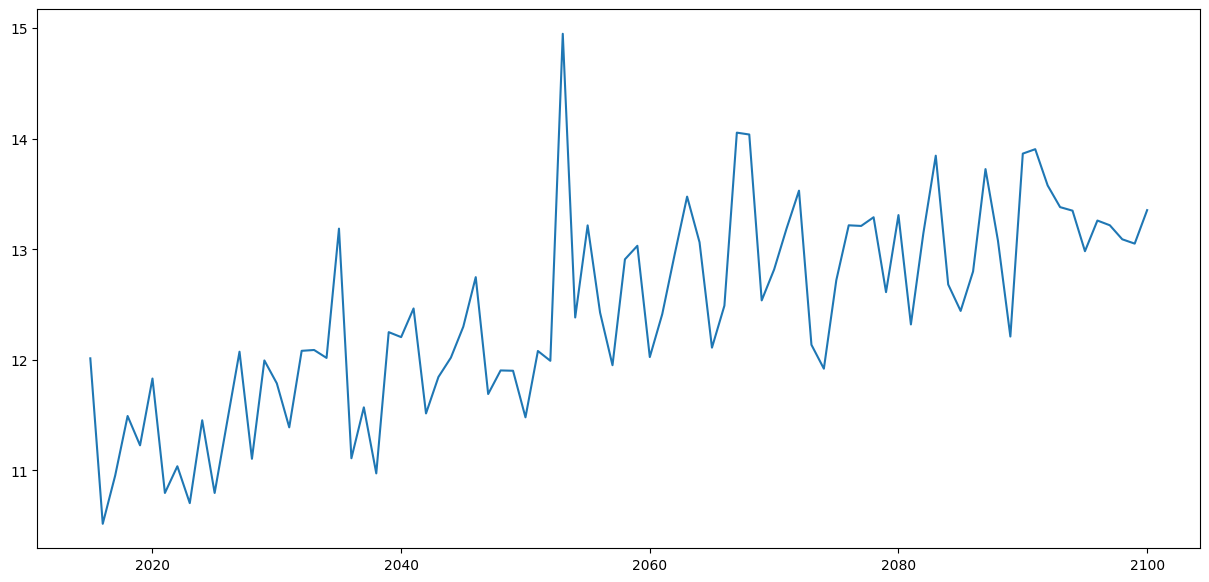

In [89]:
fig, ax = plt.subplots(figsize=(15,7))
plt.plot(s_by_year)

<BarContainer object of 86 artists>

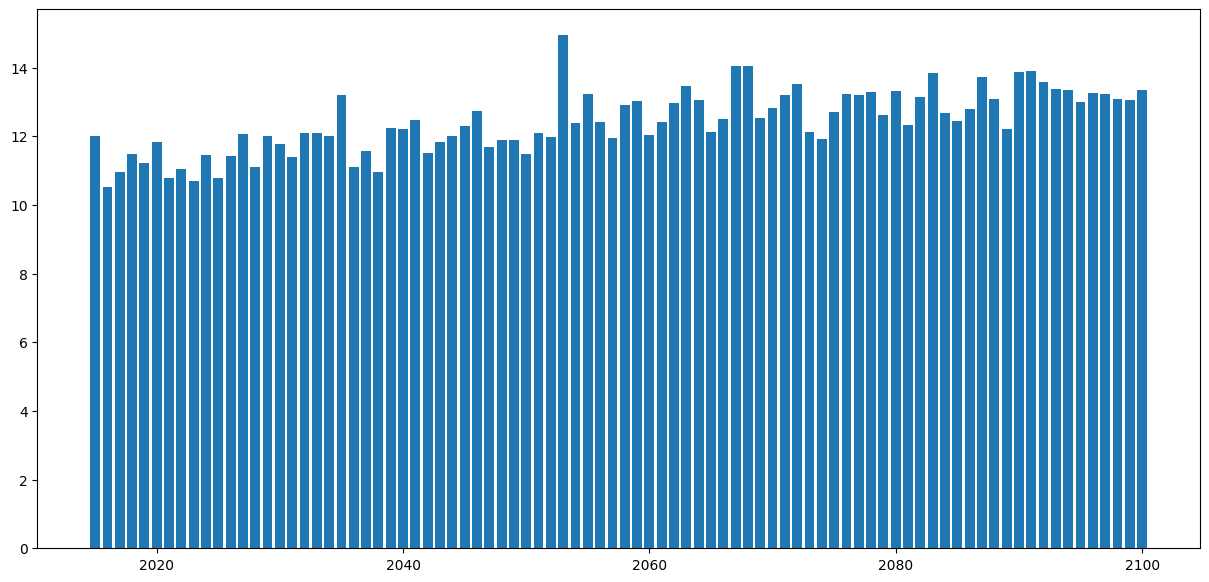

In [90]:
fig, ax = plt.subplots(figsize=(15,7))
plt.bar(s_by_year.index, df_by_year)

In [97]:
diff_by_year = s_by_year.transform(lambda x: x-12)
diff_by_year

date
2015    0.013630
2016   -1.483171
2017   -1.046873
2018   -0.508136
2019   -0.773464
          ...   
2096    1.260235
2097    1.217444
2098    1.090557
2099    1.051393
2100    1.354267
Name: temperature, Length: 86, dtype: float64

In [109]:
min_diff, max_diff = (diff_by_year.min(), diff_by_year.max())

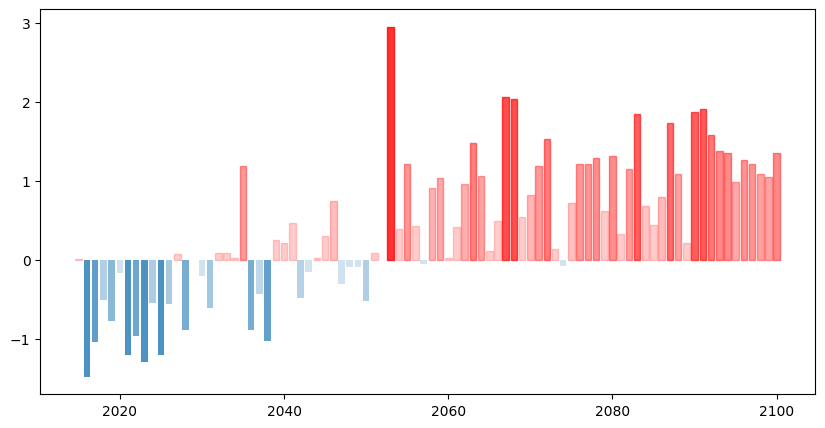

In [122]:
fig, ax = plt.subplots(figsize=(10,5))
ax = plt.bar(diff_by_year.index, diff_by_year)

def clip_alpha(x):
    return np.clip(x, 0.2, 0.8)

for bar, v in zip(ax, diff_by_year):
    if v < 0:
        bar.set_alpha(clip_alpha(abs(v/min_diff)))
    else:
        bar.set_color('r')
        bar.set_alpha(clip_alpha(abs(v/max_diff)))

## Historical and future temperatures

In [145]:
y = [kelvin_to_celsius(x) for x in all_years["tas"].values]
x = all_years["time"].values

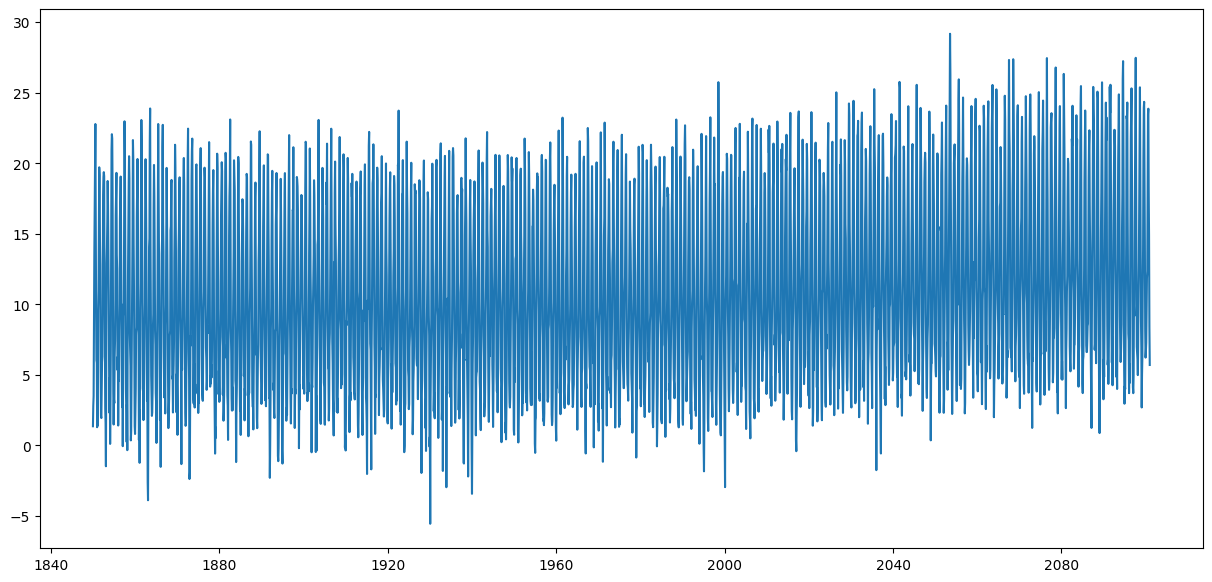

In [146]:
fig, ax = plt.subplots(figsize=(15, 7))
ax.plot(x, y)

In [147]:
df = pd.DataFrame(data={"date": x, "temperature": y })
s_by_year = df.groupby(df.date.dt.year)["temperature"].mean()

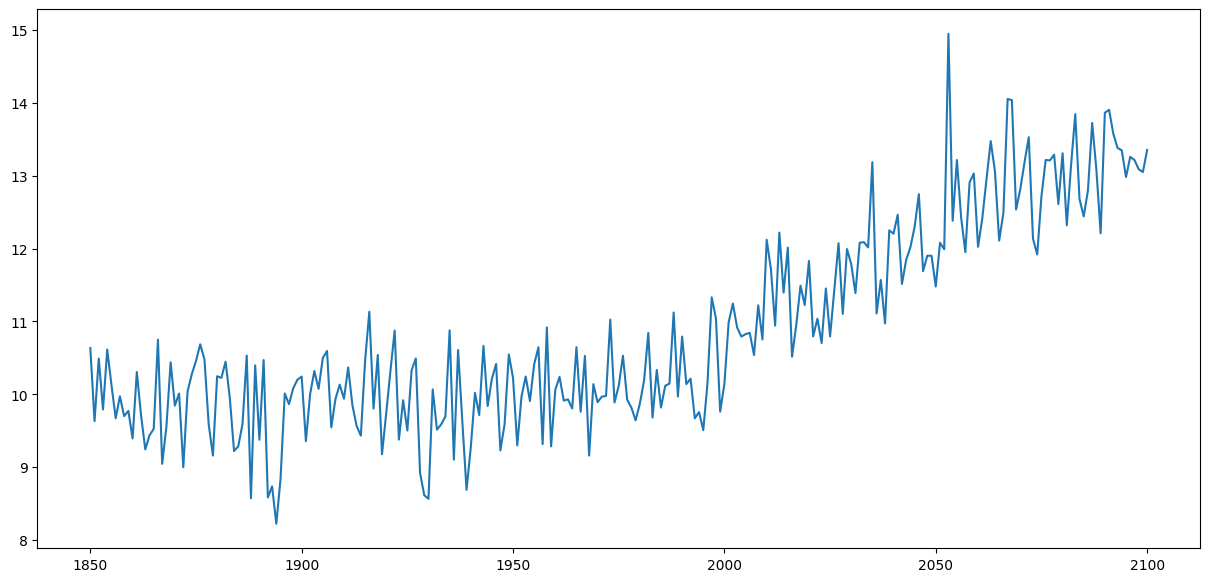

In [148]:
fig, ax = plt.subplots(figsize=(15,7))
plt.plot(s_by_year)

In [154]:
diff_by_year = s_by_year.transform(lambda x: x-11.5)

In [155]:
min_diff, max_diff = (diff_by_year.min(), diff_by_year.max())

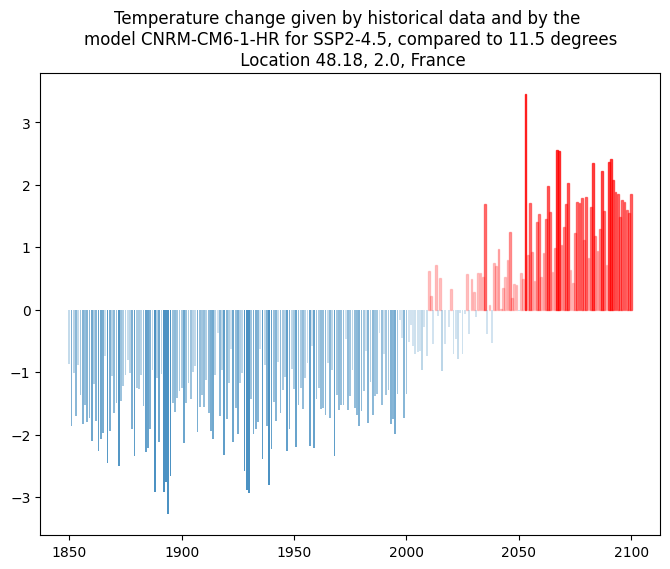

In [190]:
fig, ax = plt.subplots(figsize=(8, 6))
ax = plt.bar(diff_by_year.index, diff_by_year)

# patch = mpatches.Patch(label="Local temperature change from 11.5 degrees")
# plt.legend(handles=[patch], loc="upper left")
plt.title("Temperature change given by historical data and by the \nmodel CNRM-CM6-1-HR for SSP2-4.5, compared to 11.5 degrees\n Location 48.18, 2.0, France")
def clip_alpha(x):
    return np.clip(x, 0.2, 0.8)

for bar, v in zip(ax, diff_by_year):
    if v < 0:
        bar.set_alpha(clip_alpha(abs(v/min_diff)))
    else:
        bar.set_color('r')
        bar.set_alpha(clip_alpha(abs(v/max_diff)))

plt.savefig("./data/warming_stripes.jpg")
plt.savefig("./data/warming_stripes.png")

<Figure size 640x480 with 0 Axes>